In [1]:
import numpy as np
pi=np.pi
#
import matplotlib.pyplot as plt

In [2]:
import phasr as phr

In [3]:
phr.__version__

'0.3.1.dev0+gea06a1e.d20250207'

# Nuclei

In [97]:
# Coulomb
nucleus_coulomb = phr.nucleus('Al27_coulomb',Z=13,A=27)

In [98]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_FB = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [99]:
# Fermi (2 parameter)
nucleus_2pF = phr.nucleus('Al27_2pF',Z=13,A=27,c=3.07,z=0.519)
nucleus_2pF.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_Al27_2pFfermi2p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Al27_2pFfermi2p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Al27_2pFfermi2p_x=0.0-1000.0-1.0.txt


In [100]:
# Gauss
nucleus_gauss = phr.nucleus('Al27_gauss',Z=13,A=27,b=2.48)

In [101]:
# Uniform
nucleus_uni = phr.nucleus('Al27_uni',Z=13,A=27,rc=3.92)

In [102]:
# oszillator basis (shell model)
Cs_M00_Al27=np.array([27, -11.3343, 0.837814])
Cs_M01_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipp00_Al27=np.array([-4.98975 , 0.997985])
Cs_Phipp01_Al27=np.array([0.303398 , -0.0606814])
Ci_dict_Al27={'M00':Cs_M00_Al27,'M01':Cs_M01_Al27,'Phipp00':Cs_Phipp00_Al27,'Phipp01':Cs_Phipp01_Al27}
nucleus_osz = phr.nucleus('Al27_osz',Z=13,A=27,Ci_dict=Ci_dict_Al27)

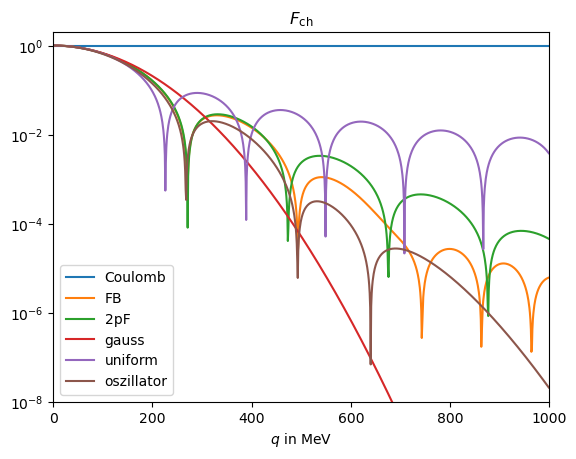

In [103]:
q=np.arange(1,1000,1.)
plt.plot(q,np.abs(nucleus_coulomb.form_factor(q)),label='Coulomb')
plt.plot(q,np.abs(nucleus_FB.form_factor(q)),label='FB')
plt.plot(q,np.abs(nucleus_2pF.form_factor(q)),label='2pF')
plt.plot(q,np.abs(nucleus_gauss.form_factor(q)),label='gauss')
plt.plot(q,np.abs(nucleus_uni.form_factor(q)),label='uniform')
plt.plot(q,np.abs(nucleus_osz.form_factor(q)),label='oszillator')
plt.title(r'$F_\operatorname{ch}$')
plt.xlabel(r'$q$ in MeV')
plt.ylim(1e-8,2)
plt.xlim(0,1000)
plt.yscale('log')
plt.legend()
plt.show()

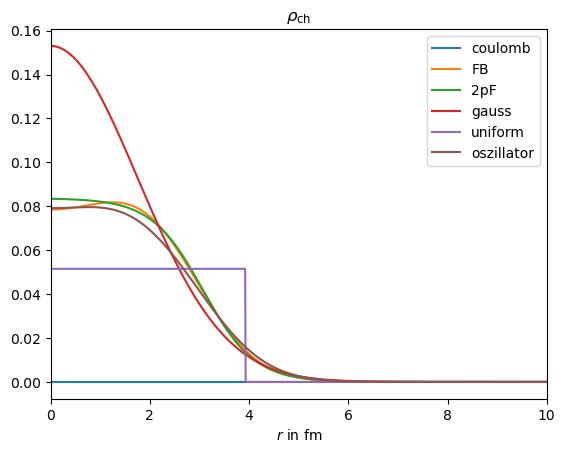

In [104]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_coulomb.charge_density(r),label='coulomb')
plt.plot(r,nucleus_FB.charge_density(r),label='FB')
plt.plot(r,nucleus_2pF.charge_density(r),label='2pF')
plt.plot(r,nucleus_gauss.charge_density(r),label='gauss')
plt.plot(r,nucleus_uni.charge_density(r),label='uniform')
plt.plot(r,nucleus_osz.charge_density(r),label='oszillator')
plt.xlim(0,10)
plt.title(r'$\rho_\operatorname{ch}$')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

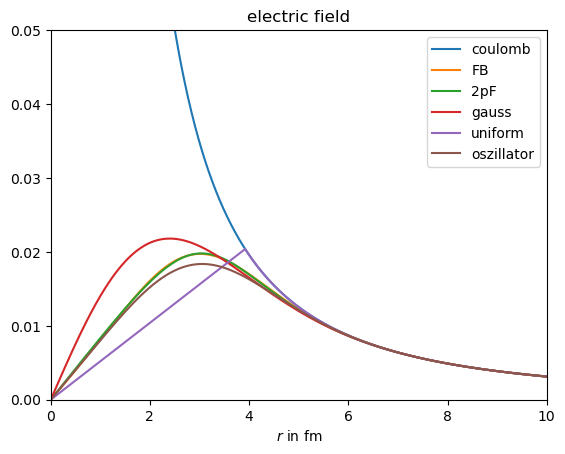

In [105]:
r=np.arange(1e-2,10,1e-2)
plt.plot(r,nucleus_coulomb.electric_field(r),label='coulomb')
plt.plot(r,nucleus_FB.electric_field(r),label='FB')
plt.plot(r,nucleus_2pF.electric_field(r),label='2pF')
plt.plot(r,nucleus_gauss.electric_field(r),label='gauss')
plt.plot(r,nucleus_uni.electric_field(r),label='uniform')
plt.plot(r,nucleus_osz.electric_field(r),label='oszillator')
plt.xlim(0,10)
plt.ylim(0,0.05)
plt.title(r'electric field')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

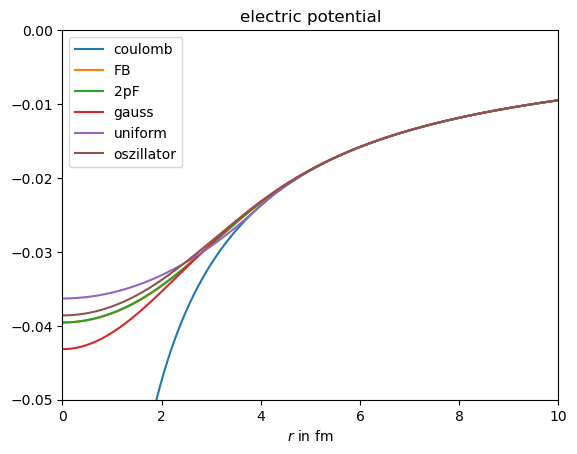

In [96]:
r=np.arange(1e-2,10,1e-2)
plt.plot(r,nucleus_coulomb.electric_potential(r),label='coulomb')
plt.plot(r,nucleus_FB.electric_potential(r),label='FB')
plt.plot(r,nucleus_2pF.electric_potential(r),label='2pF')
plt.plot(r,nucleus_gauss.electric_potential(r),label='gauss')
plt.plot(r,nucleus_uni.electric_potential(r),label='uniform')
plt.plot(r,nucleus_osz.electric_potential(r),label='oszillator')
plt.ylim(-0.05,0)
plt.xlim(0,10)
plt.title(r'electric potential')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

# Boundstates

In [106]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_Al27 = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [122]:
boundstates_l0_Al27 = phr.boundstates(nucleus_Al27,kappa=-1,lepton_mass=phr.masses.mmu) 
print('E_1s=',boundstates_l0_Al27.energy_levels[0],'MeV') 

E_1s= -0.4650383801521656 MeV


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


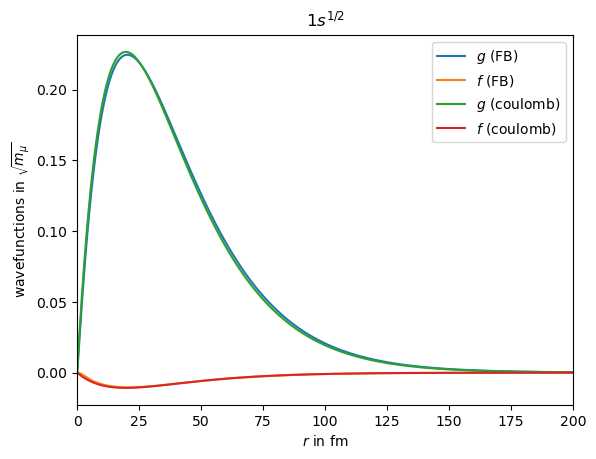

In [125]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l0_Al27.wavefunction_g_1s12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l0_Al27 .wavefunction_f_1s12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=1,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=1,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,g_c(r),label=r'$g$ (coulomb)')
plt.plot(r,f_c(r),label=r'$f$ (coulomb)')

plt.title(r'$1s^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

In [135]:
boundstates_l0_Al27.find_next_solution() 
print('E_2s=',boundstates_l0_Al27.energy_levels[1],'MeV') 

E_2s= -0.11774970562665743 MeV


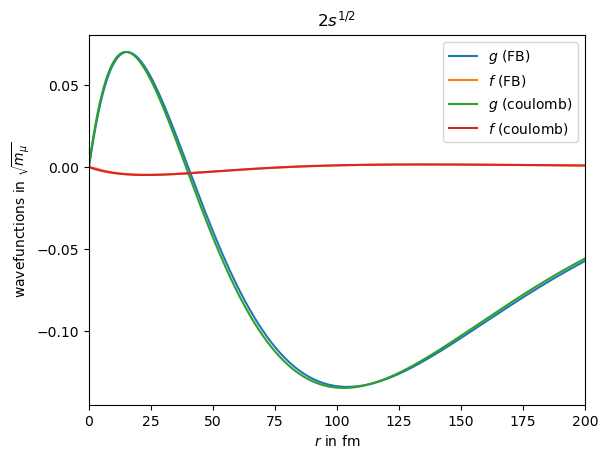

In [137]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l0_Al27.wavefunction_g_2s12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l0_Al27 .wavefunction_f_2s12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=2,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=2,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,g_c(r),label=r'$g$ (coulomb)')
plt.plot(r,f_c(r),label=r'$f$ (coulomb)')

plt.title(r'$2s^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

In [128]:
boundstates_l1_Al27 = phr.boundstates(nucleus_Al27,kappa=+1,lepton_mass=phr.masses.mmu) 
print('E_2p12=',boundstates_l1_Al27.energy_levels[0],'MeV') 

E_2p12= -0.11921144660932725 MeV


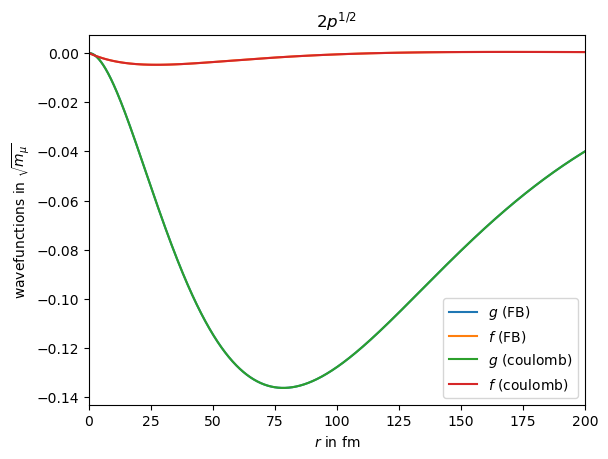

In [134]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l1_Al27.wavefunction_g_2p12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l1_Al27 .wavefunction_f_2p12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=2,kappa=+1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=2,kappa=+1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,g_c(r),label=r'$g$ (coulomb)')
plt.plot(r,f_c(r),label=r'$f$ (coulomb)')

plt.title(r'$2p^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

# Continuumstates

In [106]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_Al27 = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [ ]:
# continue here

In [20]:
cont_k = phr.continuumstates(Al,kappa=-1,energy=150)
cont_k.extract_phase_shift()
cont_k.phase_difference

-0.06179085234971993

In [8]:
%timeit cont_k = phr.continuumstates(Al,kappa=-1,energy=150,lepton_mass=0)

337 µs ± 14.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [5]:
phr.continuumstates(Al,kappa=-1,energy=150,lepton_mass=0,verbose=True)

r0= 0.005 fm
rc= 6.6 fm


In [6]:
%timeit cont_k = phr.continuumstates(Al,kappa=-1,energy=150,lepton_mass=0,beginning_radius=0.005,critical_radius=7)

238 µs ± 7.97 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:
phr.continuumstates(Al,kappa=-1,energy=150,lepton_mass=0,verbose=True,beginning_radius=0.005,critical_radius=7)

r0= 0.005 fm
rc= 7 fm


In [8]:
%%timeit 
cont_k = phr.continuumstates(Al,kappa=-1,energy=150,lepton_mass=0,beginning_radius=0.005,critical_radius=7)
cont_k.extract_phase_shift()

16.2 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
E=150
Z=79
R=4*phr.constants.hc/E
Au = phr.nucleus('test_Au',Z=79,A=197,rc=R)

In [74]:
for kappa in range(-1,-30,-1):
    cont_k = phr.continuumstates(Au,kappa=kappa,energy=150,lepton_mass=0,atol=1e-12,rtol=1e-9,verbose=False)
    cont_k.extract_phase_shift()
    print("{:2d} {:.5f}".format(kappa,cont_k.phase_difference))

-1 -0.85814
-2 -0.27138
-3 -0.07631
-4 -0.01495
-5 -0.00199
-6 -0.00019
-7 -0.00001
-8 -0.00000
-9 -0.00000
-10 -0.00000
-11 -0.00000
-12 -0.00000
-13 -0.00000
-14 -0.00000
-15 0.00000
-16 0.00000
-17 0.00000
-18 0.00000
-19 0.00000
-20 0.00000
-21 0.00000
-22 0.00000
-23 0.00000
-24 0.00000
-25 0.00000
-26 0.00000
-27 0.00000
-28 0.00000
-29 0.00000


In [25]:
# Al27 (in fm)
mAl27=phr.masses.mAl27
A_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
R_Al27=7

In [26]:
Al = phr.nucleus('test2_Al27',Z=13,A=27,ai=A_Al27,R=7)

In [27]:
cont = phr.continuumstates(Al,kappa=-1,energy=150,lepton_mass=0.5)

r0= 0.005 fm
rc= 6.6 fm


In [28]:
cont.__dict__

{'name': 'test2_Al27',
 'nucleus_type': 'fourier-bessel',
 'Z': 13.001155464519401,
 'kappa': -1,
 'energy': 150,
 'lepton_mass': 0.5,
 'nucleus': <src.phasr.nuclei.parameterisations.fourier_bessel.nucleus_FB at 0x1a740074f40>,
 'Vmin': -0.03955479035793174,
 'inital_continuumstate_settings': {'beginning_radius_norm': None,
  'beginning_radius': 0.005,
  'critical_radius_norm': None,
  'critical_radius': 6.6,
  'asymptotic_radius_norm': None,
  'asymptotic_radius': 20,
  'radius_optimise_step_norm': None,
  'radius_optimise_step': 0.1,
  'energy_precision_norm': None,
  'energy_precision': None,
  'energy_subdivisions': None,
  'atol': 1e-09,
  'rtol': 1e-06,
  'method': 'DOP853',
  'verbose': True,
  'renew': True,
  'save': False},
 'pass_eta_regular': -0.047350599579911716,
 'pass_eta_irregular': -1.5231294787511447,
 'solver_setting': <src.phasr.dirac_solvers.base.solver_settings at 0x1a73fd75ee0>,
 'pass_hyper1f1_regular': array(-0.1516574+0.11359032j),
 'pass_hyper1f1_irregular':

In [29]:
cont.solve_IVP()

y0= [ 6.33070022e-02 -8.41119392e-05]
A/B= 0.0187847565298765
 A = 0.2063098144853965
 B = 10.982831433416129
norm 11.188695944424573


(0.0, 50.0)

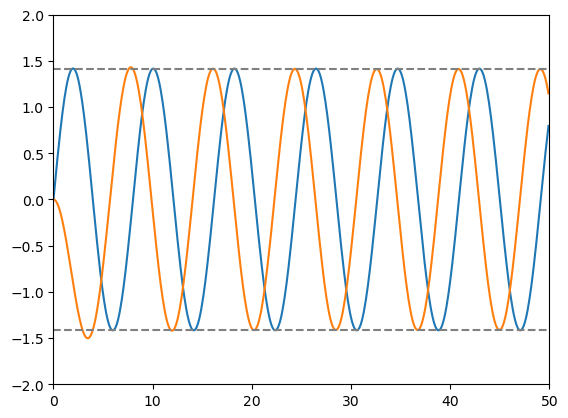

In [30]:
r=np.arange(0,50,0.1)
plt.plot(r,cont.wavefct_g(r))
plt.plot(r,cont.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
plt.ylim(-2,2)
plt.xlim(0,50)

r0= 0.005 fm
rc= 6.6 fm
y0= [ 0.11622083 -0.00025307]
A/B= -0.39506095500526656
 A = -8.200388116365456
 B = 20.757273054878674
norm 12.583815906175428


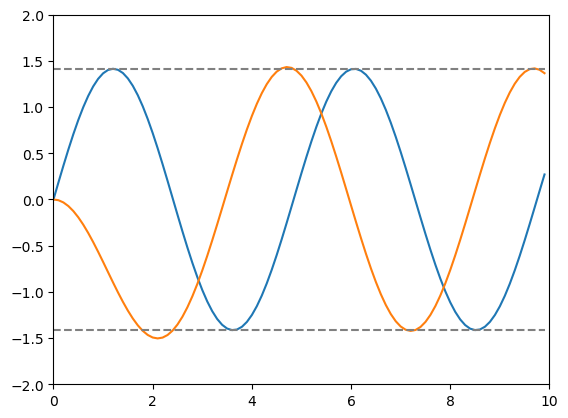

r0= 0.005 fm
rc= 6.6 fm
y0= [ 5.81437906e-03 -7.59642265e-06]
A/B= -0.20156109700118532
 A = -73.15537285356952
 B = 362.9439110124476
norm 289.83398571993934


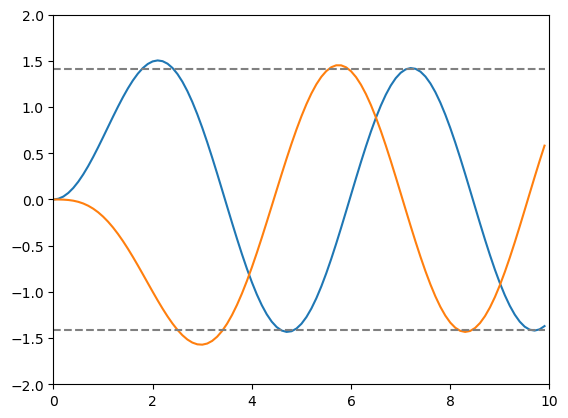

r0= 0.005 fm
rc= 6.6 fm
y0= [ 2.77304419e-04 -2.58782139e-07]
A/B= 0.4540234349802818
 A = 3327.6928367044015
 B = 7329.341572090707
norm 10656.530030887148


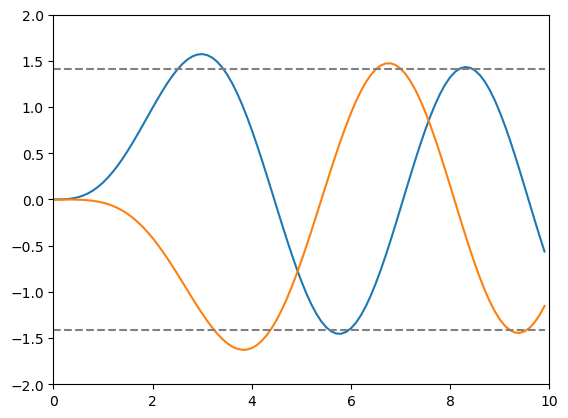

r0= 0.005 fm
rc= 6.6 fm
y0= [ 6.71469053e-06 -4.87370156e-09]
A/B= 2.3796477229836115
 A = 197330.9820254781
 B = 82924.45143017377
norm 280248.1964035061


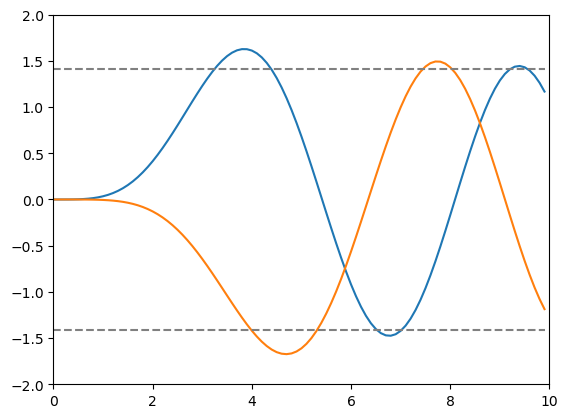

r0= 0.005 fm
rc= 6.6 fm
y0= [ 3.82330741e-07 -2.27050214e-10]
A/B= 8.654573935502874
 A = 20088944.671564616
 B = 2321193.9514613836
norm 22409973.575844284


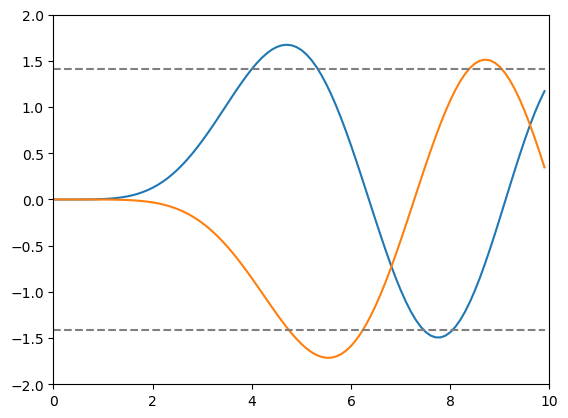

r0= 0.005 fm
rc= 6.6 fm
y0= [ 6.39777520e-09 -3.21485191e-12]
A/B= 32.03469304891808
 A = 625656865.5959058
 B = 19530602.79492943
norm 645186425.1846379


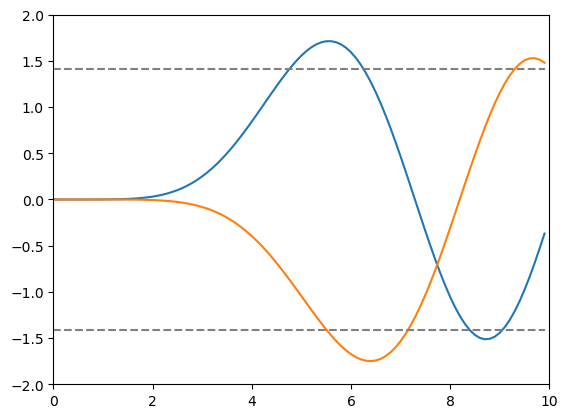

r0= 0.005 fm
rc= 6.6 fm
y0= [ 1.23075200e-10 -5.35987445e-14]
A/B= 132.65887021898342
 A = 24846863471.396652
 B = 187298922.64558935
norm 25034154871.3307


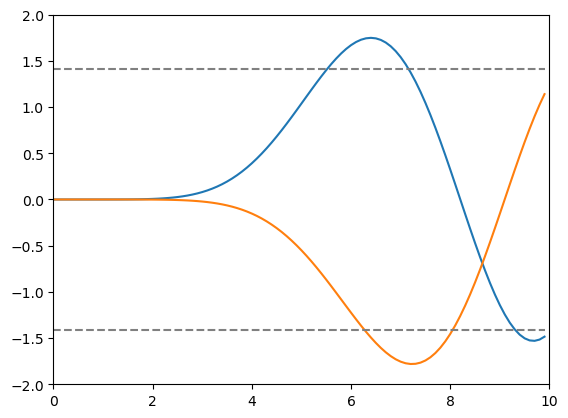

r0= 0.005 fm
rc= 6.6 fm
y0= [ 2.95577967e-12 -1.13579106e-15]
A/B= 635.8207085017199
 A = 1360550265417.662
 B = 2139833206.4769197
norm 1362690032431.7935


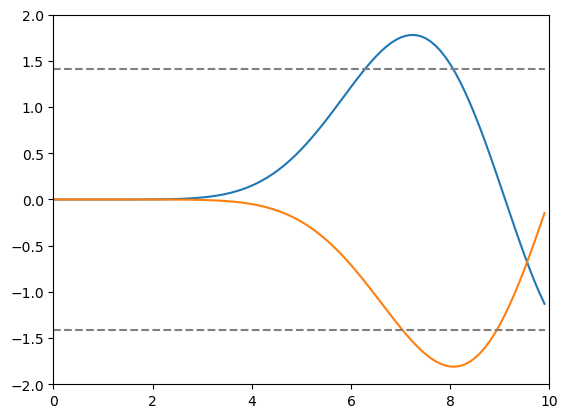

r0= 0.005 fm
rc= 6.6 fm
y0= [ 7.72300064e-14 -2.65526438e-17]
A/B= 3556.75619877979
 A = 76364024624666.3
 B = 21470131872.08737
norm 76385494231109.92


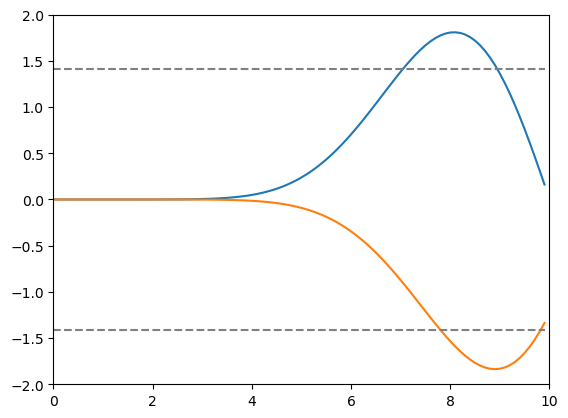

r0= 0.005 fm
rc= 6.6 fm
y0= [ 2.11126482e-15 -6.56747924e-19]
A/B= 23176.06489508977
 A = 5599386308900264.0
 B = 241602115555.28506
norm 5599627906225495.0


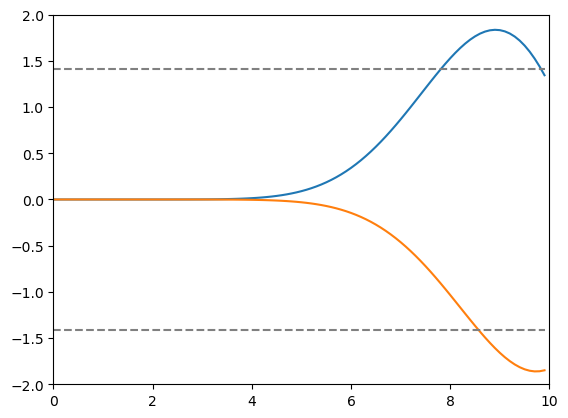

r0= 0.005 fm
rc= 6.6 fm
y0= [ 5.93645150e-17 -1.68606523e-20]
A/B= 172243.29201967324
 A = 3.7655351368644294e+17
 B = 2186172298909.8108
norm 3.765556998229176e+17


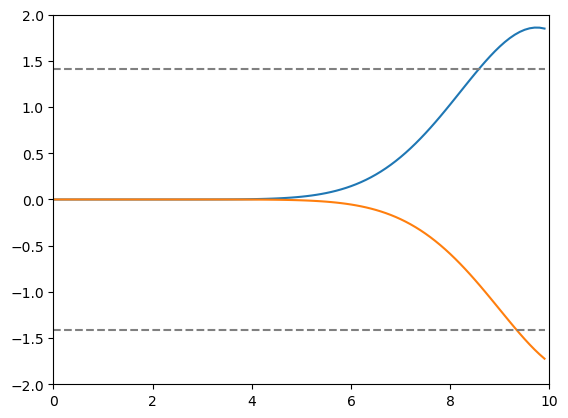

r0= 0.005 fm
rc= 6.6 fm
y0= [ 1.70138067e-18 -4.44566533e-22]
A/B= 1510170.3271042951
 A = 2.0970012150100664e+19
 B = 13885858948314.799
norm 2.0970026035768414e+19


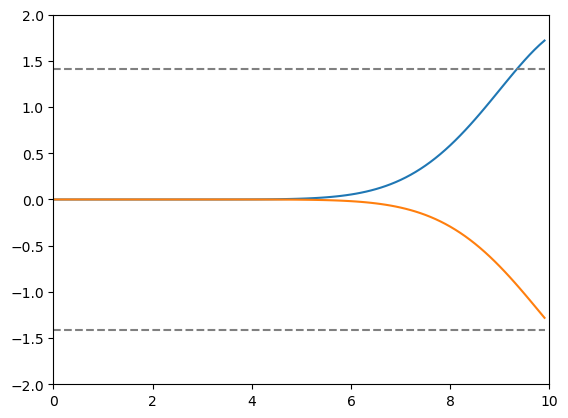

r0= 0.005 fm
rc= 6.6 fm
y0= [ 4.94336819e-20 -1.19600906e-23]
A/B= 15949795.287113236
 A = 7.69409077612506e+20
 B = 48239432780316.38
norm 7.694091258513728e+20


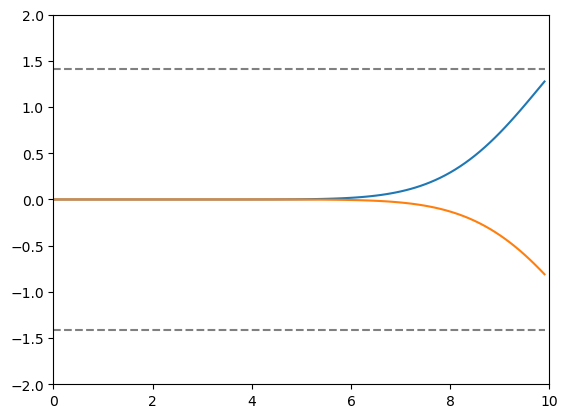

r0= 0.005 fm
rc= 6.6 fm
y0= [ 1.45106360e-21 -3.26861465e-25]
A/B= 180861007.94484267
 A = 2.4003571687827706e+22
 B = 132718334153860.83
norm 2.4003571820544695e+22


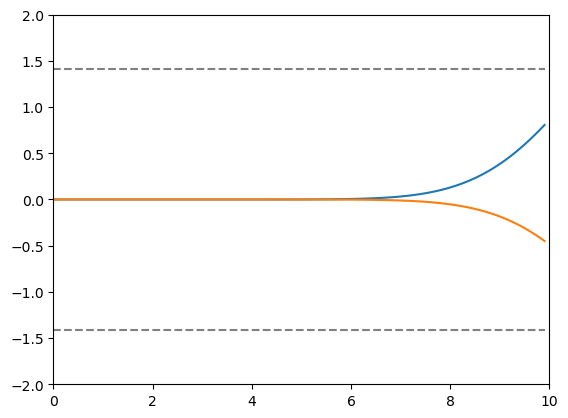

r0= 0.005 fm
rc= 6.6 fm
y0= [ 4.29310388e-23 -9.04659140e-27]
A/B= 2505892889.270018
 A = 1.5175997885745505e+23
 B = 60561239272147.69
norm 1.5175997891801574e+23


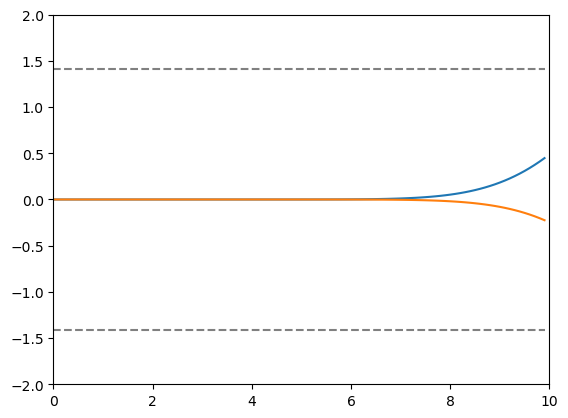

r0= 0.005 fm
rc= 6.6 fm
y0= [ 1.27807530e-24 -2.52998399e-28]
A/B= 37412645012.3672
 A = 6.833530538290147e+23
 B = 18265296495426.188
norm 6.833530538472797e+23


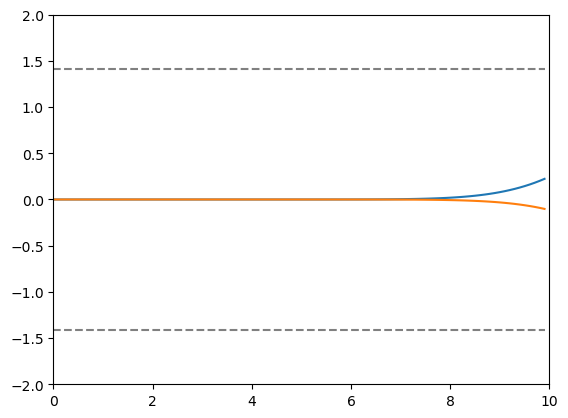

r0= 0.005 fm
rc= 6.6 fm
y0= [ 3.82397277e-26 -7.13710381e-30]
A/B= 637389906593.8473
 A = 2.4258794828347366e+25
 B = 38059584215859.52
norm 2.4258794828385424e+25


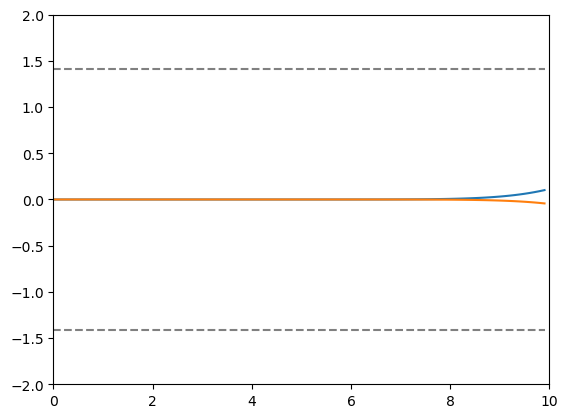

r0= 0.005 fm
rc= 6.6 fm
y0= [ 1.14881848e-27 -2.02826621e-31]
A/B= 12118691123746.764
 A = 8.468198743766722e+26
 B = 69877172850565.97
norm 8.46819874376742e+26


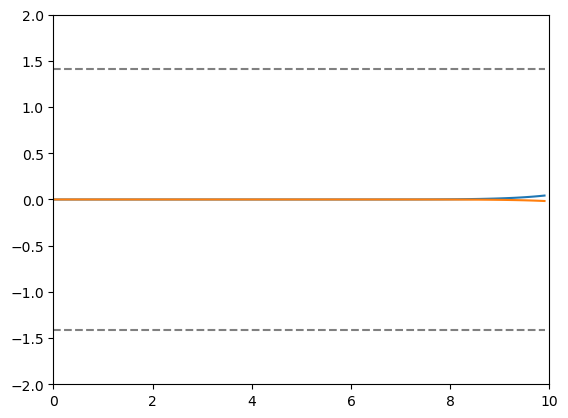

r0= 0.005 fm
rc= 6.6 fm
y0= [ 3.46308783e-29 -5.80061663e-33]
A/B= 255538524727625.44
 A = 2.82852071400536e+28
 B = 110688621882756.67
norm 2.8285207140053704e+28


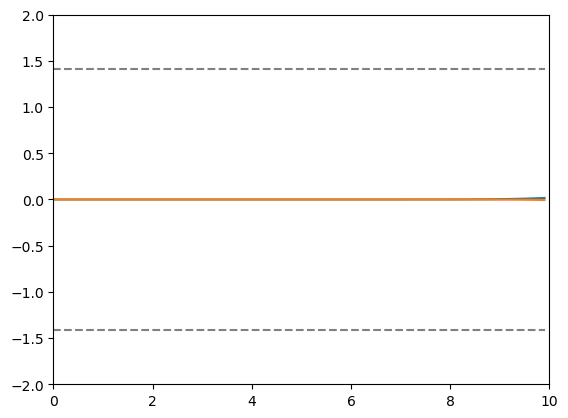

In [31]:
for kappa in np.arange(-1,-20,-1):
    cont1 = phr.continuumstates(Al,kappa=kappa,energy=250,lepton_mass=0)
    cont1.solve_IVP()
    r=np.arange(0,10,0.1)
    plt.plot(r,cont1.wavefct_g(r))
    plt.plot(r,cont1.wavefct_f(r))
    plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
    plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
    plt.ylim(-2,2)
    plt.xlim(0,10)
    plt.show()

r0= 0.005 fm
rc= 6.6 fm
y0= [ 7.72300064e-14 -2.65526438e-17]
A/B= 3559.1593063133673
 A = 97969428853276.06
 B = 27526002750.001747
norm 97996954182395.0


(0.0, 10.0)

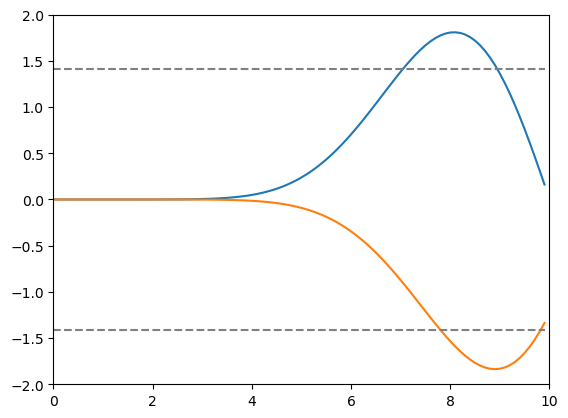

In [10]:
cont1 = phr.continuumstates(Al,kappa=-9,energy=250,lepton_mass=0,method='DOP853',rtol=1e-9,atol=1e-12)
cont1.solve_IVP()
r=np.arange(0,10,0.1)
plt.plot(r,cont1.wavefct_g(r))
plt.plot(r,cont1.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
plt.ylim(-2,2)
plt.xlim(0,10)

r0= 0.005 fm
rc= 6.6 fm
y0= [ 2.11126482e-15 -6.56747924e-19]
A/B= 23327.840320688912
 A = 7664003051399001.0
 B = 328534615551.27234
norm 7664331579500588.0


(0.0, 10.0)

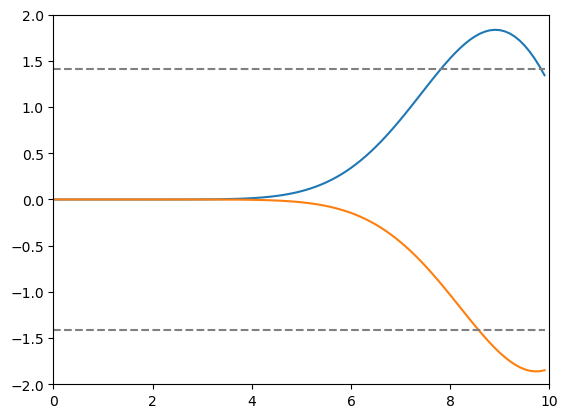

In [11]:
cont1 = phr.continuumstates(Al,kappa=-10,energy=250,lepton_mass=0,method='DOP853',rtol=1e-9,atol=1e-12)
cont1.solve_IVP()
r=np.arange(0,10,0.1)
plt.plot(r,cont1.wavefct_g(r))
plt.plot(r,cont1.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
plt.ylim(-2,2)
plt.xlim(0,10)

r0= 0.005 fm
rc= 6.6 fm
y0= [ 6.71469053e-06 -4.87370156e-09]
A/B= 2.3799108991688507
 A = 197337.49167210696
 B = 82918.01669592934
norm 280248.2716406859
r0= 0.005 fm
rc= 6.6 fm
y0= [ 6.71469053e-06 -4.87370156e-09]
A/B= 2.3799108540836253
 A = 197337.53038598582
 B = 82918.03453367997
norm 280248.32819079916


(0.0, 10.0)

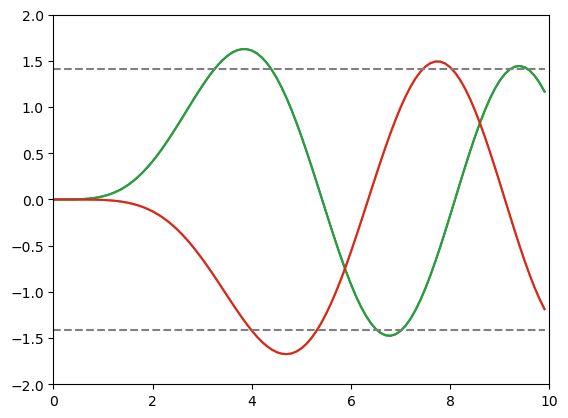

In [12]:
cont1 = phr.continuumstates(Al,kappa=-4,energy=250,lepton_mass=0,method='DOP853',rtol=1e-9,atol=1e-12)
cont1.solve_IVP()

cont2 = phr.continuumstates(Al,kappa=-4,energy=250,lepton_mass=0,method='LSODA',rtol=1e-9,atol=1e-12)
cont2.solve_IVP()

r=np.arange(0,10,0.1)
plt.plot(r,cont1.wavefct_g(r))
plt.plot(r,cont1.wavefct_f(r))
plt.plot(r,cont2.wavefct_g(r))
plt.plot(r,cont2.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
plt.ylim(-2,2)
plt.xlim(0,10)

In [13]:
cont.extract_phase_shift()

A/B= 0.0187847565298765


In [14]:
cont.phase_difference

-0.06191633397777263

In [15]:
cont1 = phr.continuumstates(Al,kappa=-1,energy=150,lepton_mass=0,atol=1e-12,rtol=1e-9,verbose=False)
cont2 = phr.continuumstates(Al,kappa=+1,energy=150,lepton_mass=0,atol=1e-9,rtol=1e-6,verbose=False)

In [16]:
cont1.extract_phase_shift()
print(cont1.phase_difference)
cont2.extract_phase_shift()
print(cont2.phase_difference)

-0.06179085235925408
-0.061791065584645644


In [17]:
cont1 = phr.continuumstates(Al,kappa=-1,energy=250,lepton_mass=0,atol=1e-12,rtol=1e-9,verbose=False)
cont2 = phr.continuumstates(Al,kappa=-1,energy=250,lepton_mass=0,atol=1e-9,rtol=1e-6,verbose=False)
cont3 = phr.continuumstates(Al,kappa=-1,energy=250,lepton_mass=0,atol=1e-6,rtol=1e-3,verbose=False)

In [18]:
cont1.extract_phase_shift()
cont1.phase_difference

-0.10416885864301673

In [19]:
cont2.extract_phase_shift()
cont2.phase_difference

-0.10416934713894932

In [20]:
cont3.extract_phase_shift()
cont3.phase_difference

-0.10440726105168219

In [21]:
(cont1.phase_difference - cont2.phase_difference) / cont1.phase_difference

-4.689462272669606e-06

In [22]:
(cont1.phase_difference - cont3.phase_difference) / cont1.phase_difference

-0.002288614963925625

In [23]:
%timeit cont1.extract_phase_shift()

32.4 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%timeit cont2.extract_phase_shift()

14.3 ms ± 224 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%timeit cont3.extract_phase_shift()

14.3 ms ± 294 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
cont1.solve_IVP()
cont2.solve_IVP()
cont3.solve_IVP()

In [27]:
%timeit cont1.solve_IVP()

54.9 ms ± 3.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%timeit cont2.solve_IVP()

27.5 ms ± 1.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
%timeit cont3.solve_IVP()

14.1 ms ± 272 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
(cont1.regular_irregular_fraction - cont2.regular_irregular_fraction) / cont1.regular_irregular_fraction

-6.964120302868849e-06

In [31]:
(cont1.regular_irregular_fraction - cont3.regular_irregular_fraction) / cont1.regular_irregular_fraction

-0.0032297064948153334

(0.0, 10.0)

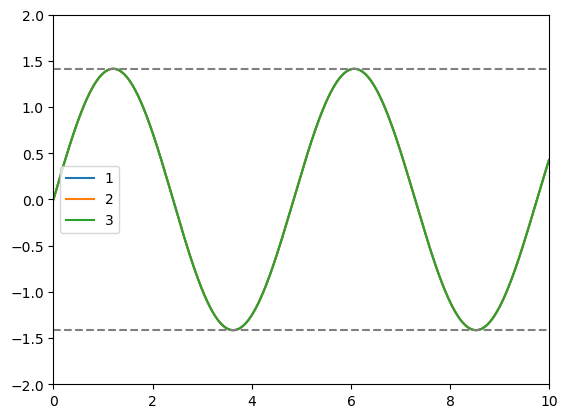

In [32]:
r=np.arange(0,10,1e-2)
plt.plot(r,cont1.wavefct_g(r),label='1')
plt.plot(r,cont2.wavefct_g(r),label='2')
plt.plot(r,cont3.wavefct_g(r),label='3')
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
plt.ylim(-2,2)
plt.legend()
plt.xlim(0,10)

(0.0, 10.0)

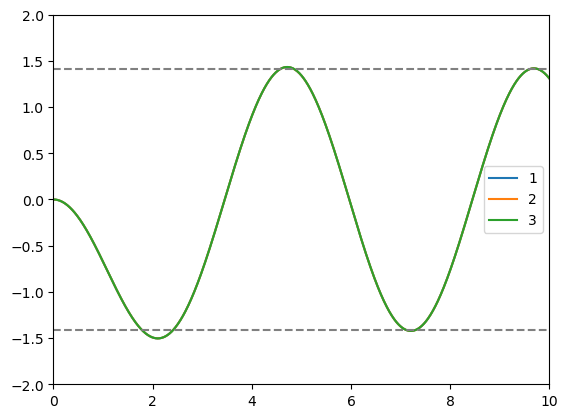

In [33]:
r=np.arange(0,10,1e-2)
plt.plot(r,cont1.wavefct_f(r),label='1')
plt.plot(r,cont2.wavefct_f(r),label='2')
plt.plot(r,cont3.wavefct_f(r),label='3')
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
plt.ylim(-2,2)
plt.legend()
plt.xlim(0,10)

In [46]:
for kappa in range(-1,-30,-1):
    cont_k = phr.continuumstates(Al,kappa=kappa,energy=50,lepton_mass=0,atol=1e-12,rtol=1e-9,verbose=False)
    cont_k.extract_phase_shift()
    print(kappa,cont_k.phase_difference,cont_k.phase_shift)

-1 -0.011056427805028912 0.003644809136174265
-2 -0.0003158059296994864 -0.060537510792007865
-3 -6.663089127112443e-06 -0.10097853518916944
-4 -1.0696827512646223e-07 -0.12924688221622915
-5 -1.3560017553260195e-09 -0.1509534316002068
-6 -1.3913759033812312e-11 -0.16858618139802273
-7 -1.1723955140041653e-13 -0.18343951003521042
-8 -8.881784197001252e-16 -0.19627346828282644
-9 0.0 -0.20757300223733566
-10 0.0 -0.2176667045414753
-11 0.0 -0.22678762611736047
-12 0.0 -0.235107100136819
-13 0.0 -0.24275479595737792
-14 0.0 -0.2498312307381454
-15 0.0 -0.2564159078349739
-16 0.0 -0.2625727979817576
-17 0.0 -0.2683541413427868
-18 0.0 -0.27380315249623166
-19 0.0 -0.2789559877273149
-20 0.0 -0.2838432036977281
-21 0.0 -0.28849085761457616
-22 0.0 -0.292921349727159
-23 0.0 -0.29715407736249944
-24 0.0 -0.3012059489432346
-25 0.0 -0.3050917924944372
-26 0.0 -0.3088246836135724
-27 0.0 -0.31241621124004126
-28 0.0 -0.31587669486714987
-29 0.0 -0.3192153634704269


In [47]:
for kappa in range(-1,-30,-1):
    cont_k = phr.continuumstates(Al,kappa=kappa,energy=250,lepton_mass=0,atol=1e-12,rtol=1e-9,verbose=False)
    cont_k.extract_phase_shift()
    print(kappa,cont_k.phase_difference,cont_k.phase_shift)

-1 -0.10416885962694011 -0.08946762268573694
-2 -0.03944840032954566 -0.09967010519185404
-3 -0.01443872579592842 -0.11541059789597075
-4 -0.004658276900655345 -0.13390505214860937
-5 -0.0013045169329597428 -0.1522579471771648
-6 -0.00031758459944408735 -0.16890376598355306
-7 -6.726917803101529e-05 -0.1835067792131242
-8 -1.2364741325043838e-05 -0.1962858330241506
-9 -1.966080917181756e-06 -0.20757496831825284
-10 -2.701577943575728e-07 -0.21766697469926966
-11 -3.213607779883887e-08 -0.22678765825343827
-12 -3.3228388929273933e-09 -0.2351071034596579
-13 -3.0027713648905774e-10 -0.24275479625765506
-14 -2.3854695996305963e-11 -0.2498312307620001
-15 -1.6755485887642863e-12 -0.25641590783664947
-16 -1.0480505352461478e-13 -0.2625727979818624
-17 -5.773159728050814e-15 -0.26835414134279256
-18 -2.220446049250313e-16 -0.2738031524962319
-19 0.0 -0.2789559877273149
-20 0.0 -0.2838432036977281
-21 0.0 -0.28849085761457616
-22 0.0 -0.292921349727159
-23 0.0 -0.29715407736249944
-24 0.0 -0.

In [48]:
for kappa in range(-1,-40,-1):
    cont_k = phr.continuumstates(Al,kappa=kappa,energy=500,lepton_mass=0,atol=1e-12,rtol=1e-9,verbose=False)
    cont_k.extract_phase_shift()
    print(kappa,cont_k.phase_difference,cont_k.phase_shift)

-1 -0.1673498216024023 -0.15264858466119913
-2 -0.09507513280043867 -0.15529683766274704
-3 -0.0586785770949132 -0.15965044919495552
-4 -0.0363487230779167 -0.16559549832587073
-5 -0.021980486548756506 -0.17293391679296155
-6 -0.012784176533632952 -0.18137035791774192
-7 -0.007089479213385319 -0.1905289892484785
-8 -0.003732073416180537 -0.20000554169900608
-9 -0.0018629428758720756 -0.20943594511320773
-10 -0.0008822310795686406 -0.21854893562104394
-11 -0.0003959835192832717 -0.22718360963664375
-12 -0.0001675145520447785 -0.2352746146888638
-13 -6.608043264577645e-05 -0.2428208763900237
-14 -2.3995768152040853e-05 -0.24985522650629743
-15 -7.929943156792518e-06 -0.2564238377781307
-16 -2.3663072732382773e-06 -0.2625751642890308
-17 -6.349913617142988e-07 -0.2683547763341485
-18 -1.53172121208911e-07 -0.27380330566835287
-19 -3.324934239046229e-08 -0.2789560209766573
-20 -6.512530070779121e-09 -0.28384321021025816
-21 -1.155404216746092e-09 -0.2884908587699804
-22 -1.8673240731459373

In [49]:
for kappa in range(-1,-40,-1):
    cont_k = phr.continuumstates(Al,kappa=kappa,energy=500,lepton_mass=0.5,atol=1e-9,rtol=1e-6,verbose=False)
    cont_k.extract_phase_shift()
    print(kappa,cont_k.phase_difference,cont_k.phase_shift)

-1 -0.16739757300105218 -0.15264889542117577
-2 -0.09509827353869049 -0.15529629180433746
-3 -0.058692838673435554 -0.15964895011088331
-4 -0.03635818737827856 -0.1655931688848109
-5 -0.02198684576173804 -0.17293086478926245
-6 -0.012788313129338036 -0.1813666732278758
-7 -0.007092086205722659 -0.1905249117497929
-8 -0.0037338135013107454 -0.20000145073612385
-9 -0.0018639825426425283 -0.20943181817982248
-10 -0.0008827524840508971 -0.21854482251073648
-11 -0.0003962777036790044 -0.22717970508007213
-12 -0.00016803084815775193 -0.23527129574822636
-13 -6.618147597059476e-05 -0.2428174500811746
-14 -2.4128829682723563e-05 -0.24985209637736716
-15 -7.937633490495699e-06 -0.2564208114440407
-16 -2.3412356642271703e-06 -0.26257230591093994
-17 -6.289878564658125e-07 -0.26835211430262707
-18 -1.5333819902707546e-07 -0.27380080754229397
-19 -3.793912339844496e-08 -0.27895366864511173
-20 -8.01237431957702e-09 -0.28384098195733953
-21 -2.0191466276742176e-09 -0.28848874514165335
-22 -4.756728

In [50]:
for kappa in range(-1,-50,-1):
    cont_k = phr.continuumstates(Al,kappa=kappa,energy=1000,lepton_mass=0,atol=1e-12,rtol=1e-9,verbose=False)
    cont_k.extract_phase_shift()
    print(kappa,cont_k.phase_difference,cont_k.phase_shift)

-1 -0.23244802950972776 -0.21774679256852458
-2 -0.15819780084990676 -0.21841950571221513
-3 -0.11856522732305952 -0.21953709942310184
-4 -0.09184700038203797 -0.221093775629992
-5 -0.07212720553432295 -0.223080635778528
-6 -0.05689879621518856 -0.22548497759929753
-7 -0.044850011436778914 -0.2282895214718721
-8 -0.035198212222059766 -0.2314716805048853
-9 -0.02743001465920436 -0.23500301689654002
-10 -0.021182328379754534 -0.23884903292122983
-11 -0.016181798119533353 -0.24296942423689383
-12 -0.012211776432598853 -0.24731887656941787
-13 -0.00909361091383687 -0.2518484068712148
-14 -0.006675935412306044 -0.25650716615045144
-15 -0.0048286228785667795 -0.2612445307135407
-16 -0.0034394525180054814 -0.26601225049976307
-17 -0.002412268206828827 -0.2707664095496156
-18 -0.0016658170380114967 -0.27546896953424316
-19 -0.00113276045532551 -0.2800887481826404
-20 -0.0007585744653040294 -0.2846017781630321
-21 -0.0005002231985562489 -0.2889910808131324
-22 -0.00032463101389179627 -0.2932459

C:\Users\Frederic\Documents\Code\phasr\src\phasr\dirac_solvers\continuumstate.py:162: RuntimeWarning: divide by zero encountered in log10
  scale_initial=10**(-np.log10(np.abs(initials[0]))-(np.log10(np.abs(critical_coulomb))-np.log10(np.abs(initial_coulomb)))/2.)
C:\Users\Frederic\Documents\Code\phasr\src\phasr\dirac_solvers\continuumstate.py:164: RuntimeWarning: invalid value encountered in multiply
  initials=scale_initial*initials


KeyboardInterrupt: 

## test critical radius

(0.0, 10.0)

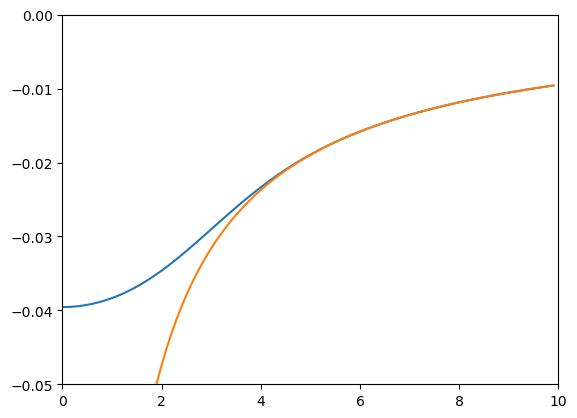

In [133]:
r=np.arange(1e-12,10,0.1)
plt.plot(r,Al.electric_potential(r))
plt.plot(r,-phr.constants.alpha_el*13/r)
plt.ylim(-0.05,0)
plt.xlim(0,10)

In [136]:
0.04*phr.constants.hc/(phr.constants.alpha_el*phr.masses.mmu)

10.237106157768077

In [141]:
Al.R

7

In [146]:
Al.total_charge

13.001155464519401

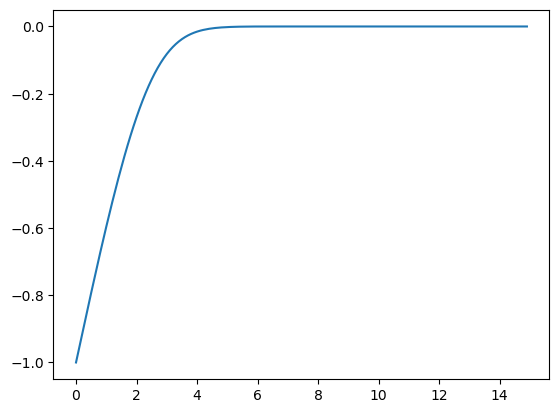

In [6]:
r=np.arange(1e-12,15,0.1)
rel = (Al.electric_potential(r) - (-phr.constants.alpha_el*Al.total_charge/r))/(-phr.constants.alpha_el*Al.total_charge/r)
plt.plot(r,rel)
#plt.ylim(-1e-6,1e-6)

In [7]:
r[np.abs(rel)<1e-6]

array([ 6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9])

In [157]:
r[np.abs(rel)<1e-6][0]

6.600000000001001

In [160]:
nuc_test3 = phr.nucleus('test3_Al27',Z=20,A=40,c=3.6758,z=0.5851,w=-0.1017)
nuc_test3.set_electric_field_from_charge_density()
nuc_test3.set_electric_potential_from_electric_field()

data not found at ./tmp/nucleus_splines/electric_field_test3_Al27fermi3p_x=0.0-20.0-0.02.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/electric_field_test3_Al27fermi3p_x=0.0-20.0-0.02.txt
data not found at ./tmp/nucleus_splines/electric_potential_test3_Al27fermi3p_x=0.0-20.0-0.02.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/electric_potential_test3_Al27fermi3p_x=0.0-20.0-0.02.txt


(0.0, 10.0)

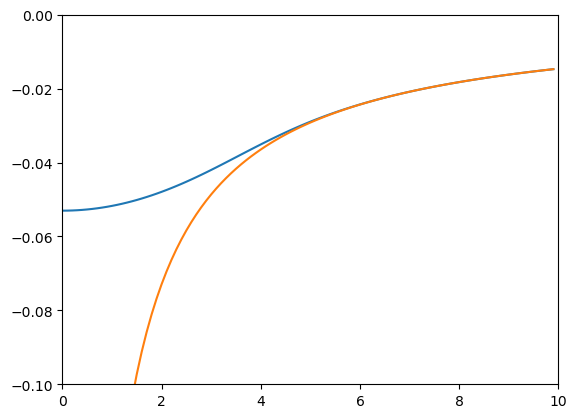

In [163]:
r=np.arange(1e-12,10,0.1)
plt.plot(r,nuc_test3.electric_potential(r))
plt.plot(r,-phr.constants.alpha_el*20/r)
plt.ylim(-0.1,0)
plt.xlim(0,10)

(-1e-05, 1e-05)

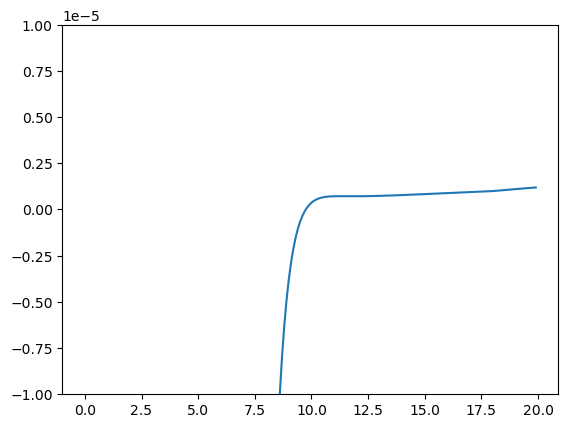

In [176]:
r=np.arange(1e-12,20,0.1)
rel = (nuc_test3.electric_potential(r) - (-phr.constants.alpha_el*nuc_test3.total_charge/r))/(-phr.constants.alpha_el*nuc_test3.total_charge/r)
plt.plot(r,rel)
plt.ylim(-1e-5,1e-5)

In [174]:
r[np.abs(rel)<1e-6]

array([ 9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5,
       10.6, 10.7, 10.8, 10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6,
       11.7, 11.8, 11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7,
       12.8, 12.9, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8,
       13.9, 14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9,
       15. , 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16. ,
       16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17. , 17.1,
       17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18. ])

In [175]:
r[np.abs(rel)<1e-6][0]

9.500000000001

In [177]:
E=150/phr.constants.hc
b01=2.12
b02=3.40
b1=b01/E
b2=b02/E

In [178]:
nuc_test5 = phr.nucleus('test5_Al27',Z=20,A=40,b=b1)

(0.0, 10.0)

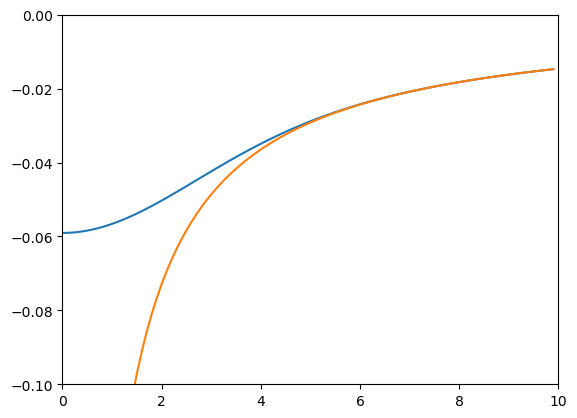

In [179]:
r=np.arange(1e-12,10,0.1)
plt.plot(r,nuc_test5.electric_potential(r))
plt.plot(r,-phr.constants.alpha_el*20/r)
plt.ylim(-0.1,0)
plt.xlim(0,10)

(-1e-05, 1e-05)

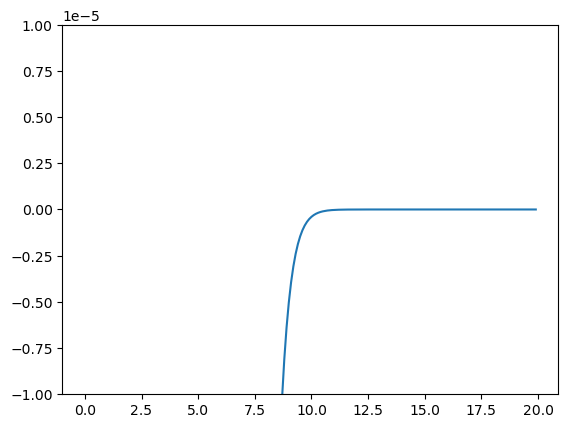

In [180]:
r=np.arange(1e-12,20,0.1)
rel = (nuc_test5.electric_potential(r) - (-phr.constants.alpha_el*nuc_test5.total_charge/r))/(-phr.constants.alpha_el*nuc_test5.total_charge/r)
plt.plot(r,rel)
plt.ylim(-1e-5,1e-5)

In [181]:
r[np.abs(rel)<1e-6]

array([ 9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7,
       10.8, 10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8,
       11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9,
       13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. ,
       14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1,
       15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16. , 16.1, 16.2,
       16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17. , 17.1, 17.2, 17.3,
       17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18. , 18.1, 18.2, 18.3, 18.4,
       18.5, 18.6, 18.7, 18.8, 18.9, 19. , 19.1, 19.2, 19.3, 19.4, 19.5,
       19.6, 19.7, 19.8, 19.9])

In [182]:
r[np.abs(rel)<1e-6][0]

9.700000000001001

In [183]:
nuc_test6 = phr.nucleus('test6_Pb207',Z=82,A=207,c=6.62,z=0.546)
nuc_test6.set_electric_field_from_charge_density()
nuc_test6.set_electric_potential_from_electric_field()

data not found at ./tmp/nucleus_splines/electric_field_test6_Pb207fermi2p_x=0.0-20.0-0.02.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/electric_field_test6_Pb207fermi2p_x=0.0-20.0-0.02.txt
data not found at ./tmp/nucleus_splines/electric_potential_test6_Pb207fermi2p_x=0.0-20.0-0.02.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/electric_potential_test6_Pb207fermi2p_x=0.0-20.0-0.02.txt


(0.0, 10.0)

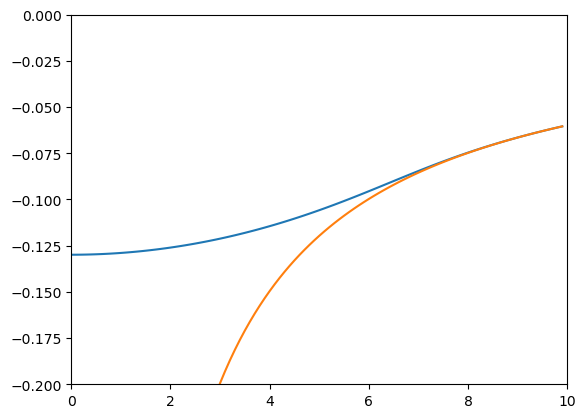

In [187]:
r=np.arange(1e-12,10,0.1)
plt.plot(r,nuc_test6.electric_potential(r))
plt.plot(r,-phr.constants.alpha_el*82/r)
plt.ylim(-0.2,0)
plt.xlim(0,10)

(-1e-05, 1e-05)

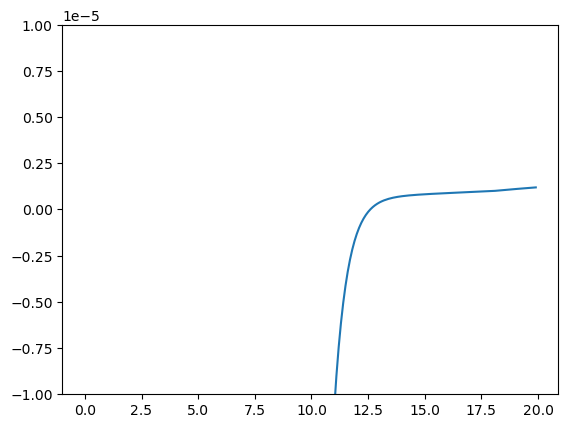

In [188]:
r=np.arange(1e-12,20,0.1)
rel = (nuc_test6.electric_potential(r) - (-phr.constants.alpha_el*nuc_test6.total_charge/r))/(-phr.constants.alpha_el*nuc_test6.total_charge/r)
plt.plot(r,rel)
plt.ylim(-1e-5,1e-5)

In [189]:
r[np.abs(rel)<1e-6]

array([12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3,
       15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16. , 16.1, 16.2, 16.3, 16.4,
       16.5, 16.6, 16.7, 16.8, 16.9, 17. , 17.1, 17.2, 17.3, 17.4, 17.5,
       17.6, 17.7, 17.8, 17.9, 18. ])

In [190]:
r[np.abs(rel)<1e-6][0]

12.100000000001002

# Crosssection

In [11]:
# Al27 (in fm)
mAl27=phr.masses.mAl27
A_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
R_Al27=7
Al = phr.nucleus('test2_Al27',Z=13,A=27,ai=A_Al27,R=7)

In [4]:
E=150
Z=79
R=4*phr.constants.hc/E
Au = phr.nucleus('test_Au',Z=79,A=197,rc=R)

## Precision Accessment

In [6]:
theta=np.arange(10,180,1)
phr.dirac_solvers.post_processing.crosssection.optimise_precision(250,theta*pi/180,Al,crosssection_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 1.6265408992767334 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 1.48980712890625 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 1.357375144958496 1.8342341207812598e-09
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 1.2237372398376465 3.943034642067095e-08
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 1.2235746383666992 3.943034642067095e-08
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol

{'method': 'DOP853',
 'N_partial_waves': 45,
 'atol': 1e-06,
 'rtol': 1e-08,
 'energy_norm': 0.01973269804,
 'phase_difference_limit': 1e-07}

In [5]:
theta=np.arange(10,180,1)
phr.dirac_solvers.post_processing.crosssection.optimise_precision(250,theta*pi/180,Al)

new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 1.629685401916504 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 1.4821546077728271 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 1.3530080318450928 1.8342341207812598e-09
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 1.2338547706604004 3.943034642067095e-08
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 1.2313530445098877 3.943034642067095e-08
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rt

{'method': 'DOP853',
 'N_partial_waves': 70,
 'atol': 1e-07,
 'rtol': 1e-09,
 'energy_norm': 0.01973269804,
 'phase_difference_limit': 1e-09}

In [6]:
theta=np.arange(30,90,1)
phr.dirac_solvers.post_processing.crosssection.optimise_precision(250,theta*pi/180,Al)

new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 1.6136271953582764 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 1.4768447875976562 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 1.345517635345459 8.540463144556452e-13
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 1.2074427604675293 1.858393590411091e-11
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 1.2024638652801514 1.858393590411091e-11
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rto

{'method': 'DOP853',
 'N_partial_waves': 30,
 'atol': 1e-06,
 'rtol': 1e-06,
 'energy_norm': 0.01973269804,
 'phase_difference_limit': 1e-06}

In [7]:
theta=np.arange(20,170,1)
phr.dirac_solvers.post_processing.crosssection.optimise_precision(1000,theta*pi/180,Al)

new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 12.97378158569336 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 12.842764616012573 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 11.503891706466675 7.016133783904412e-05
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 10.848554849624634 0.0008672187886860681
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-12, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 10.612635374069214 0.00027037067714875685


{'method': 'DOP853',
 'N_partial_waves': 100,
 'atol': 1e-12,
 'rtol': 1e-13,
 'energy_norm': 197.3269804,
 'phase_difference_limit': 1e-13}

In [8]:
theta=np.arange(10,40,1)
phr.dirac_solvers.post_processing.crosssection.optimise_precision(1000,theta*pi/180,Al)

new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 12.8380446434021 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 12.845040082931519 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 11.582781314849854 4.855812389061529e-10
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 10.897688150405884 1.9480278183838096e-09
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 10.354642152786255 2.78593801437483e-09
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol

{'method': 'DOP853',
 'N_partial_waves': 70,
 'atol': 1e-09,
 'rtol': 1e-08,
 'energy_norm': 19.732698040000002,
 'phase_difference_limit': 1e-09}

In [12]:
theta=np.arange(10,180,1)
phr.dirac_solvers.post_processing.crosssection.optimise_precision(250,theta*pi/180,Au,lepton_mass=0,subtractions=3,recoil=True,verbose=False)

new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 1.2641139030456543 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 1.1605162620544434 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 1.1589665412902832 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 1.0524063110351562 7.377546396417124e-11
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 0.9529404640197754 1.8492513450975871e-09
new best: {'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-13, 'rtol': 1e-13, 'ener

{'method': 'DOP853',
 'N_partial_waves': 100,
 'atol': 1e-13,
 'rtol': 1e-07,
 'energy_norm': 0.01973269804,
 'phase_difference_limit': 1e-06}

## Plots

(0.0, 180.0)

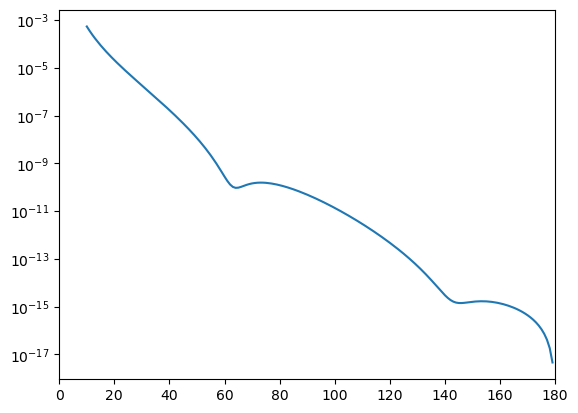

In [12]:
args={'method': 'DOP853',
 'N_partial_waves': 70,
 'atol': 1e-07,
 'rtol': 1e-09,
 'energy_norm': 0.01973269804,
 'phase_difference_limit': 1e-09}

theta=np.arange(10,180,1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,**args))
plt.yscale('log')
plt.xlim(0,180)

(0.0, 180.0)

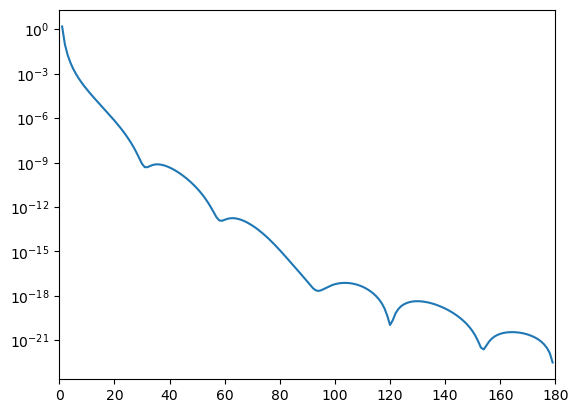

In [13]:
theta=np.arange(1,180,1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(500,theta*pi/180,Al))
plt.yscale('log')
plt.xlim(0,180)

(0.0, 180.0)

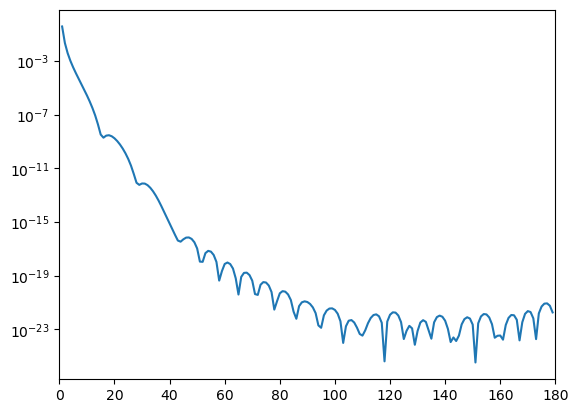

In [15]:
theta=np.arange(1,180,1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(1000,theta*pi/180,Al))
plt.yscale('log')
plt.xlim(0,180)

(30.0, 90.0)

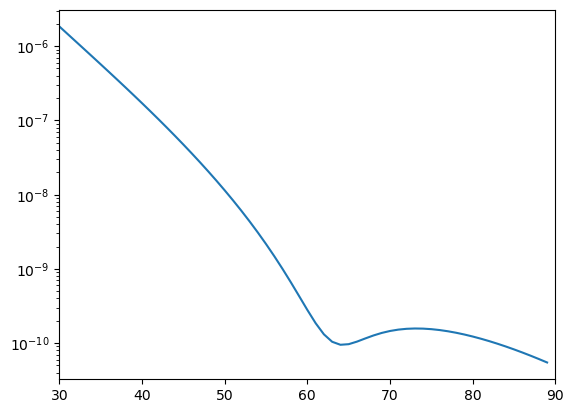

In [8]:
theta=np.arange(30,90,1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al))
plt.yscale('log')
plt.xlim(30,90)

(20.0, 40.0)

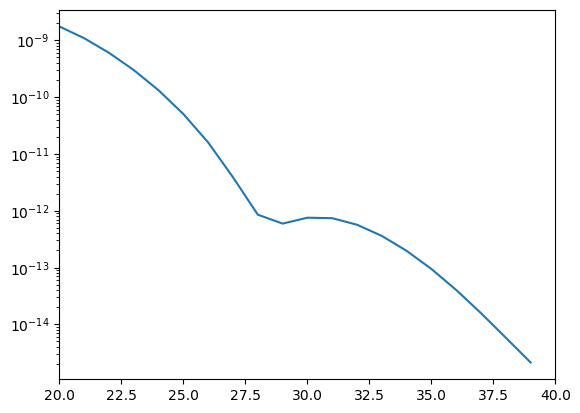

In [11]:
theta=np.arange(20,40,1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(1000,theta*pi/180,Al))
plt.yscale('log')
plt.xlim(20,40)

In [16]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=50)

337 ms ± 2.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=100)

345 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


(0.0, 180.0)

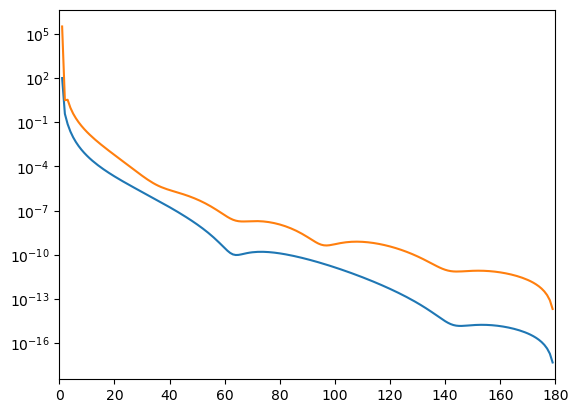

In [14]:
theta=np.arange(1,180,1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Au))
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(1000,theta*pi/180,Al,subtractions=3,N_partial_waves=50,recoil=True,verbose=False,potential_precision=1e-5))
plt.yscale('log')
plt.xlim(0,180)

(0.0, 180.0)

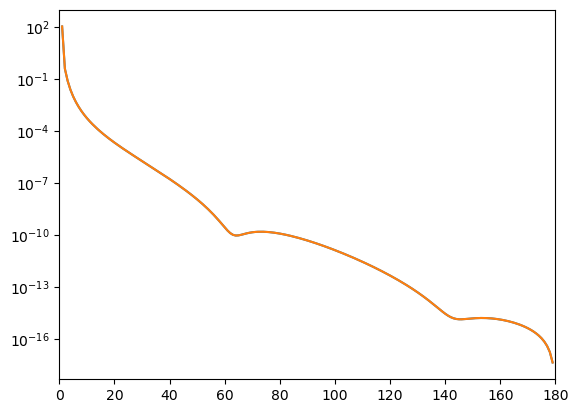

In [13]:
theta=np.arange(1,180,1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al))
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(1000,theta*pi/180,Al,subtractions=3,N_partial_waves=50,recoil=True,verbose=False,potential_precision=1e-5))
plt.yscale('log')
plt.xlim(0,180)

(0.0, 180.0)

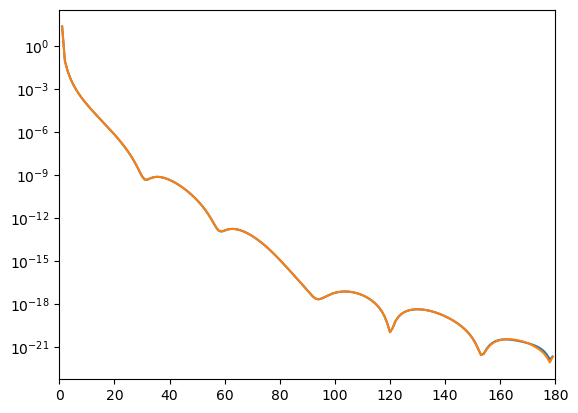

In [13]:
theta=np.arange(1,180,1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(500,theta*pi/180,Al,subtractions=3,N_partial_waves=50,recoil=True,verbose=False,phase_difference_limit=1e-9))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(500,theta*pi/180,Al,subtractions=3,N_partial_waves=50,recoil=True,verbose=False,phase_difference_limit=0))
plt.yscale('log')
plt.xlim(0,180)

(0.0, 180.0)

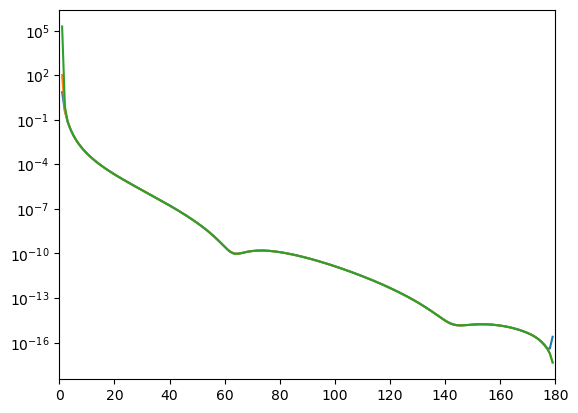

In [12]:
theta=np.arange(1,180,1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=2))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=4))
plt.yscale('log')
plt.xlim(0,180)

In [25]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=2)

400 ms ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3)

[ 0.99999093 -0.00245837]
-1 0.011984609322869842
-1 1.0762713520326364
[ 0.10552395 -0.00025942]
[ 2.45836862e-03 -3.62617112e-06]
-2 2.830451266053788e-05
-2 0.9718504409054431
[ 5.39669809e-03 -7.96029961e-06]
[ 3.62617112e-06 -3.82050921e-09]
-3 4.0336139423954204e-08
-3 -0.8394972492031384
[ 2.19198474e-04 -2.30946020e-07]
[ 3.82050921e-09 -3.13075874e-12]
-4 4.112376880085398e-11
-4 -1.421800655199519
[ 5.37807803e-06 -4.40712582e-09]
[ 3.13075874e-12 -2.09907377e-15]
-5 3.2631749049476387e-14
-5 -0.2914422298671724
[ 3.34613868e-07 -2.24347914e-10]
[ 2.09907377e-15 -1.19084460e-18]
-6 2.1192934026930703e-17
-6 1.1167412243723895
[ 4.35631493e-09 -2.47142058e-12]
[ 1.19084460e-18 -5.85510309e-22]
-7 1.1648821661896851e-20
-7 1.739159814075399
[ 8.18410612e-11 -4.02393268e-14]
[ 5.85510309e-22 -2.54013219e-25]
-8 5.549878065078989e-24
-8 1.5661654219030727
[ 1.88244764e-12 -8.16666381e-16]
[ 2.54013219e-25 -9.85992014e-29]
-9 2.3332815604757763e-27
-9 1.0607707321482711
[ 4.689999

In [7]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,method='LSODA')

407 ms ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=4)

433 ms ± 32.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [1]:
theta=np.arange(1,180,1)
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=15,recoil=True,verbose=False))
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=20,recoil=True,verbose=False))
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=20,recoil=True,verbose=False))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,method='LSODA'))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,method='LSODA',atol=1e-9,rtol=1e-9))
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=30,recoil=True,verbose=False))
plt.yscale('log')
plt.xlim(0,180)

NameError: name 'np' is not defined

In [7]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al)

323 ms ± 2.37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,method='LSODA')

193 ms ± 2.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,method='LSODA',atol=1e-9,rtol=1e-9)

253 ms ± 28.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [53]:
%prun -s ncalls phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al)

         758222 function calls (756376 primitive calls) in 0.708 seconds

   Ordered by: call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   121530    0.011    0.000    0.011    0.000 einsumfunc.py:1001(_einsum_dispatcher)
    48676    0.052    0.000    0.052    0.000 {method 'reduce' of 'numpy.ufunc' objects}
    48665    0.046    0.000    0.119    0.000 fromnumeric.py:71(_wrapreduction)
    48665    0.017    0.000    0.017    0.000 fromnumeric.py:72(<dictcomp>)
    48665    0.004    0.000    0.004    0.000 {method 'items' of 'dict' objects}
    48663    0.028    0.000    0.147    0.000 fromnumeric.py:2322(any)
    48663    0.005    0.000    0.005    0.000 fromnumeric.py:2317(_any_dispatcher)
    25459    0.002    0.000    0.002    0.000 {built-in method builtins.len}
    24306    0.008    0.000    0.046    0.000 einsumfunc.py:1009(einsum)
    24306    0.038    0.000    0.038    0.000 {built-in method numpy.core._multiarray_umath.c_einsum}
    14244 

In [14]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=20,recoil=True,verbose=False)

444 ms ± 56.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=50,recoil=True,verbose=False)

446 ms ± 43.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=50,recoil=True,verbose=False)

413 ms ± 32.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,method='LSODA')

253 ms ± 24.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,method='DOP853')

450 ms ± 62.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
for kappa in np.arange(-1,-50,-1):
    cont_k = phr.continuumstates(Al,kappa=kappa,energy=250,lepton_mass=0,atol=1e-12,rtol=1e-12,verbose=False)
    cont_k.extract_phase_shift()
    print("{:2d} {:.2e} {:.4f}".format(kappa,cont_k.phase_difference,cont_k.phase_shift))

-1 -1.04e-01 -0.0895
-2 -3.94e-02 -0.0997
-3 -1.44e-02 -0.1154
-4 -4.66e-03 -0.1339
-5 -1.30e-03 -0.1523
-6 -3.18e-04 -0.1689
-7 -6.73e-05 -0.1835
-8 -1.24e-05 -0.1963
-9 -1.97e-06 -0.2076
-10 -2.70e-07 -0.2177
-11 -3.21e-08 -0.2268
-12 -3.31e-09 -0.2351
-13 -2.99e-10 -0.2428
-14 -2.37e-11 -0.2498
-15 -1.66e-12 -0.2564
-16 -1.03e-13 -0.2626
-17 -5.77e-15 -0.2684
-18 -2.22e-16 -0.2738
-19 0.00e+00 -0.2790
-20 0.00e+00 -0.2838
-21 0.00e+00 -0.2885
-22 0.00e+00 -0.2929
-23 0.00e+00 -0.2972
-24 0.00e+00 -0.3012
-25 0.00e+00 -0.3051
-26 0.00e+00 -0.3088
-27 0.00e+00 -0.3124
-28 0.00e+00 -0.3159
-29 0.00e+00 -0.3192
-30 0.00e+00 -0.3224
-31 0.00e+00 -0.3256
-32 0.00e+00 -0.3286
-33 0.00e+00 -0.3315
-34 0.00e+00 -0.3343
-35 0.00e+00 -0.3371
-36 0.00e+00 -0.3398
-37 0.00e+00 -0.3424
-38 0.00e+00 -0.3449
-39 0.00e+00 -0.3474
-40 0.00e+00 -0.3498
-41 0.00e+00 -0.3521
-42 0.00e+00 -0.3544
-43 0.00e+00 -0.3567
-44 0.00e+00 -0.3589
-45 0.00e+00 -0.3610
-46 0.00e+00 -0.3631
-47 0.00e+00 -0.3651
-48 

In [6]:
%timeit phr.continuumstates(Al,kappa=kappa,energy=250,lepton_mass=0)

76.3 µs ± 3.93 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [9]:
theta=np.arange(1,180,1)

In [23]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=20)

E= 247.5132438565778 MeV
E= 247.5132438565778 MeV
E= 247.5132438565778 MeV
E= 247.5132438565778 MeV
E= 247.5132438565778 MeV
E= 247.5132438565778 MeV
E= 247.5132438565778 MeV
E= 247.5132438565778 MeV
263 ms ± 8.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%prun -s pcall phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=20)

         756662 function calls (755986 primitive calls) in 1.314 seconds

   Ordered by: primitive call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   121530    0.016    0.000    0.016    0.000 einsumfunc.py:1001(_einsum_dispatcher)
    48676    0.120    0.000    0.120    0.000 {method 'reduce' of 'numpy.ufunc' objects}
    48665    0.076    0.000    0.230    0.000 fromnumeric.py:71(_wrapreduction)
    48665    0.027    0.000    0.027    0.000 fromnumeric.py:72(<dictcomp>)
    48665    0.007    0.000    0.007    0.000 {method 'items' of 'dict' objects}
    48663    0.047    0.000    0.277    0.000 fromnumeric.py:2322(any)
    48663    0.008    0.000    0.008    0.000 fromnumeric.py:2317(_any_dispatcher)
    25459    0.003    0.000    0.003    0.000 {built-in method builtins.len}
    24306    0.013    0.000    0.097    0.000 einsumfunc.py:1009(einsum)
    24306    0.084    0.000    0.084    0.000 {built-in method numpy.core._multiarray_umath.c_einsum}


E= 960.2119017052443 MeV
E= 960.2119017052443 MeV
E= 960.2119017052443 MeV
E= 960.2119017052443 MeV


(0.0, 180.0)

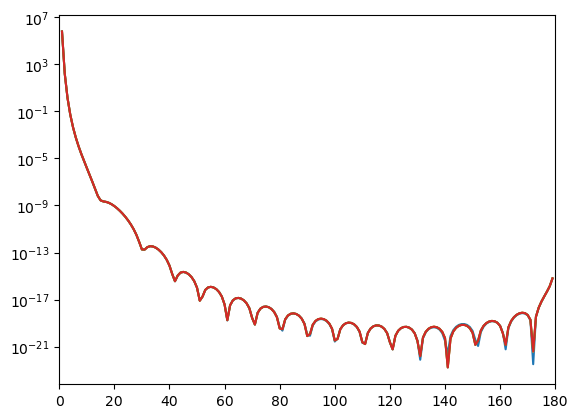

In [16]:
theta=np.arange(1,180,1)
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=15,recoil=True,verbose=False))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(1000,theta*pi/180,Al,subtractions=3,N_partial_waves=20,recoil=True,verbose=False,dps_hyper1f1=6))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(1000,theta*pi/180,Al,subtractions=3,N_partial_waves=20,recoil=True,verbose=False,dps_hyper1f1=9))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(1000,theta*pi/180,Al,subtractions=3,N_partial_waves=20,recoil=True,verbose=False,dps_hyper1f1=12))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(1000,theta*pi/180,Al,subtractions=3,N_partial_waves=20,recoil=True,verbose=False,dps_hyper1f1=15))
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=30,recoil=True,verbose=False))
plt.yscale('log')
plt.xlim(0,180)

In [26]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=20,recoil=True,verbose=False)

E= 247.5132438565778 MeV
phase differences set to zero after kappa= -19
E= 247.5132438565778 MeV
phase differences set to zero after kappa= -19
E= 247.5132438565778 MeV
phase differences set to zero after kappa= -19
E= 247.5132438565778 MeV
phase differences set to zero after kappa= -19
E= 247.5132438565778 MeV
phase differences set to zero after kappa= -19
E= 247.5132438565778 MeV
phase differences set to zero after kappa= -19
E= 247.5132438565778 MeV
phase differences set to zero after kappa= -19
E= 247.5132438565778 MeV
phase differences set to zero after kappa= -19
801 ms ± 26.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=20,recoil=True,verbose=False,method='LSODA')

E= 247.5132438565778 MeV
E= 247.5132438565778 MeV
E= 247.5132438565778 MeV
E= 247.5132438565778 MeV
E= 247.5132438565778 MeV
E= 247.5132438565778 MeV
E= 247.5132438565778 MeV
E= 247.5132438565778 MeV
259 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
# is there a way to also get these beyond 1e-16 ??? -> think this is the limit for high momenta, which need a lot of partial waves

In [ ]:
theta=np.arange(1,180,1)
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=15,recoil=True,verbose=False))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=100,lepton_mass=1e-6,recoil=True,verbose=False))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=20,recoil=True,verbose=False))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=25,recoil=True,verbose=False))
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=30,recoil=True,verbose=False))
plt.yscale('log')
plt.xlim(0,180)

E= 960.2119017052443 MeV
phase differences set to zero after kappa= -46
E= 960.2119017052443 MeV
phase differences set to zero after kappa= -46


(0.0, 180.0)

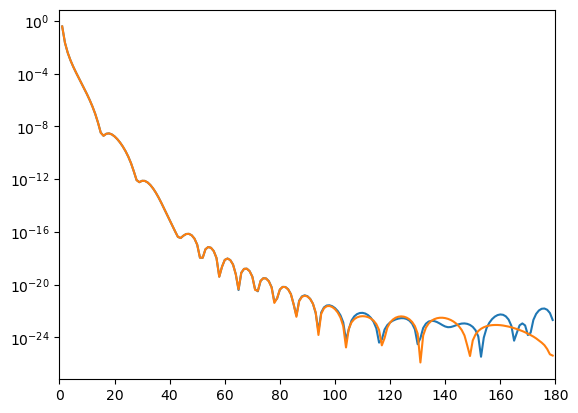

In [7]:
theta=np.arange(1,180,1)
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=100,recoil=True,method='LSODA',verbose=False))
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(500,theta*pi/180,Al,subtractions=3,N_partial_waves=100,recoil=True,method='DOP853',verbose=False))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(1000,theta*pi/180,Al,subtractions=3,N_partial_waves=100,recoil=True,method='DOP853',atol=1e-12,rtol=1e-9,verbose=False))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(1000,theta*pi/180,Al,subtractions=3,N_partial_waves=100,recoil=True,method='DOP853',atol=1e-13,rtol=1e-13,verbose=False))
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(500,theta*pi/180,Al,subtractions=3,N_partial_waves=100,recoil=True,method='DOP853',verbose=False))

plt.yscale('log')
plt.xlim(0,180)

In [20]:
# high energies still problematic

In [8]:
E=150
Z=79
R=4*phr.constants.hc/E
Au = phr.nucleus('test_Au',Z=79,A=197,rc=R)

(0.0, 180.0)

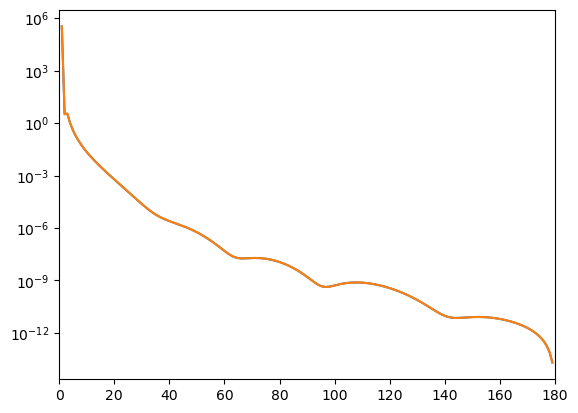

In [15]:
theta=np.arange(0,180,1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Au,subtractions=3,N_partial_waves=50))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Au,subtractions=3,N_partial_waves=50,method='LSODA'))
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(100,theta*pi/180,Au,subtractions=3,N_partial_waves=100))
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(100,theta*pi/180,Au,subtractions=3,N_partial_waves=150))

plt.yscale('log')
plt.xlim(0,180)

(0.0, 180.0)

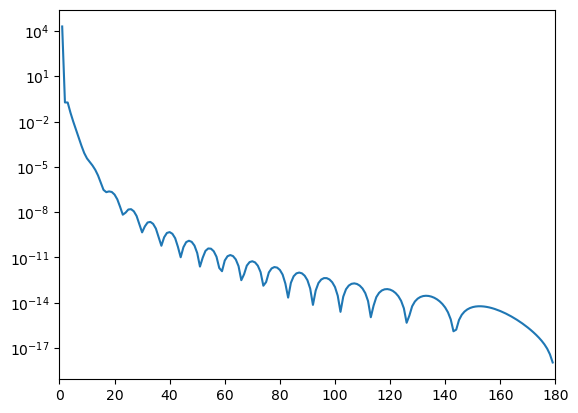

In [21]:
theta=np.arange(0,180,1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(1000,theta*pi/180,Au,subtractions=3,N_partial_waves=50))
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(1000,theta*pi/180,Au,subtractions=3,N_partial_waves=50,method='LSODA'))
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(100,theta*pi/180,Au,subtractions=3,N_partial_waves=100))
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(100,theta*pi/180,Au,subtractions=3,N_partial_waves=150))

plt.yscale('log')
plt.xlim(0,180)

(0.0, 180.0)

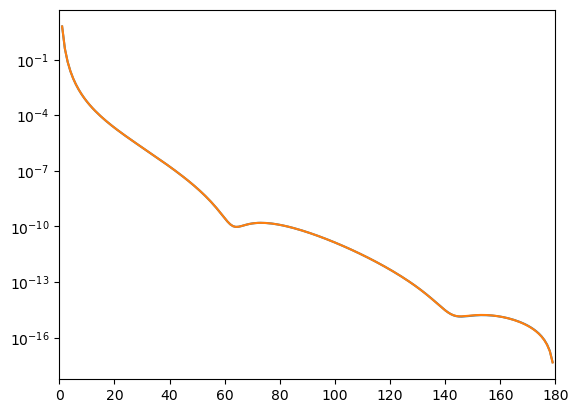

In [12]:
theta=np.arange(1,180,1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=100,recoil=True,method='DOP853',verbose=False,atol=1e-9,rtol=1e-6))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(250,theta*pi/180,Al,subtractions=3,N_partial_waves=100,recoil=True,method='DOP853',verbose=False,atol=1e-12,rtol=1e-12))
plt.yscale('log')
plt.xlim(0,180)

In [ ]:
theta=np.arange(1,180,1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(500,theta*pi/180,Al,subtractions=3,N_partial_waves=100,recoil=True,method='DOP853',verbose=False,atol=1e-9,rtol=1e-6))
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(500,theta*pi/180,Al,subtractions=3,N_partial_waves=100,recoil=True,method='DOP853',verbose=False,atol=1e-12,rtol=1e-9))
plt.yscale('log')
plt.xlim(0,180)

In [12]:
%%timeit
cont_k = phr.continuumstates(Al,kappa=-1,energy=250,lepton_mass=0,verbose=False,method='DOP853')
cont_k.extract_phase_shift()

21.5 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%%timeit
cont_k = phr.continuumstates(Al,kappa=-1,energy=250,lepton_mass=0,verbose=False,method='DOP853')
cont_k.extract_phase_shift()

21.2 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
%%timeit
cont_k = phr.continuumstates(Al,kappa=-1,energy=500,lepton_mass=0,verbose=False,method='DOP853')
cont_k.extract_phase_shift()

27.8 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%%timeit
cont_k = phr.continuumstates(Al,kappa=-1,energy=250,lepton_mass=0,verbose=False,method='DOP853',atol=1e-12,rtol=1e-12)
cont_k.extract_phase_shift()

35 ms ± 1.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
cont_k = phr.continuumstates(Al,kappa=-1,energy=250,lepton_mass=0,verbose=True)
cont_k.extract_phase_shift()

r0= 0.005 fm
rc= 6.6 fm
A/B= -0.39505810693420584


In [19]:
for kappa in range(-1,-30,-1):
    cont_k = phr.continuumstates(Al,kappa=kappa,energy=250,lepton_mass=0,method='LSODA',verbose=False)
    cont_k.extract_phase_shift()
    cont_k2 = phr.continuumstates(Al,kappa=kappa,energy=250,lepton_mass=0,method='DOP853',verbose=False)
    cont_k2.extract_phase_shift()
    print(kappa,cont_k.phase_shift,cont_k2.phase_shift)

-1 -0.08946762165768485 -0.08946762170181355
-2 -0.09967010533877274 -0.09967010450999991
-3 -0.11541059666709064 -0.11541059678560872
-4 -0.1339050511242723 -0.13390505106213357
-5 -0.1522579468559191 -0.15225794658306002
-6 -0.16890376267432194 -0.16890376437245713
-7 -0.18350677689029649 -0.18350677679238814
-8 -0.19628583129112176 -0.19628583136174704
-9 -0.20757496756146443 -0.2075749676031422
-10 -0.21766697445933714 -0.21766697447768157
-11 -0.22678765820201452 -0.22678765820247726
-12 -0.23374559237766412 -0.23510710345031782
-13 -0.24275628439300956 -0.24275479625625507
-14 -0.24983160343253852 -0.24983123076182978
-15 -0.25641578059147063 -0.25641590783663304
-16 -0.26257281880077343 -0.2625727979818606
-17 -0.26835413892597737 -0.26835414134279256
-18 -0.27380315241403674 -0.2738031524962319
-19 -0.2789559877259311 -0.2789559877273149
-20 -0.28384320369762506 -0.2838432036977281
-21 -0.28849085761456816 -0.28849085761457616
-22 -0.2929213497271568 -0.292921349727159
-23 -0.2

In [29]:
kappa=-1
cont_k = phr.continuumstates(Al,kappa=kappa,energy=250,lepton_mass=0,method='LSODA')
cont_k.extract_phase_shift()
cont_k2 = phr.continuumstates(Al,kappa=-kappa,energy=250,lepton_mass=0,method='LSODA')
cont_k2.extract_phase_shift()
print(kappa,cont_k.phase_shift,cont_k2.phase_shift)

r0= 1e-06 fm
rc= 7 fm
A/B= -0.39504054029043967
r0= 1e-06 fm
rc= 7 fm
A/B= -0.3950405379657602
-1 -0.08946460880415241 -0.08946460840545245


# overlap integral

In [4]:
# Al27 (in fm)
mAl27=phr.masses.mAl27
A_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
R_Al27=7

In [5]:
nuc_test2 = phr.nucleus('test2_Al27',Z=13,A=27,ai=A_Al27,R=7)

In [6]:
phr.overlap_integral_scalar(nuc_test2,'ch')

0.015383089987481287

In [7]:
phr.overlap_integral_vector(nuc_test2,'ch')

0.01595771660506487

In [8]:
phr.overlap_integral_dipole(nuc_test2)

0.036151011782709574

# Tests

In [5]:
A_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
R_Al27=7
nuc_al= phr.nucleus(name='Al27',Z=13,A=27,ai=A_Al27,R=R_Al27)

test_boundstates = phr.boundstates(nuc_al,kappa=-1,lepton_mass=phr.masses.mmu,verbose=True,renew=True,save=False)
test_boundstates.__dict__

r0= 0.0004140353130462759 fm
rc= 124.21059391388278 fm
rinf= 414.0353130462759 fm
dr= 4.140353130462759 fm
dE= 4.765945661691546e-07 MeV
data not found or forced to recalculate.
This may take some time.
Searching for boundstate in the range of: [ -7.8052268650911385 , 0.0 ]
[ -0.47304405242977055 , -0.3942033770248088 ]-> -0.43362371472728967
[ -0.46508034784341135 , -0.4642839773847811 ]-> -0.46468216261409623
[ -0.4650401271131841 , -0.4650320829671273 ]-> -0.4650361050401557
[ -0.465038420779166 , -0.46503833952516516 ]-> -0.4650383801521656


{'name': 'Al27',
 'nucleus_type': 'fourier-bessel',
 'Z': 13.001155464519401,
 'kappa': -1,
 'lepton_mass': 105.6583745,
 '_current_principal_quantum_number': 1,
 'principal_quantum_numbers': [1],
 'inital_boundstate_settings': {'beginning_radius_norm': 1e-06,
  'beginning_radius': None,
  'critical_radius_norm': 0.3,
  'critical_radius': None,
  'asymptotic_radius_norm': 1,
  'asymptotic_radius': None,
  'radius_optimise_step_norm': 0.01,
  'radius_optimise_step': None,
  'energy_precision_norm': 1e-06,
  'energy_precision': None,
  'energy_subdivisions': 100,
  'potential_precision': None,
  'atol': 1e-12,
  'rtol': 1e-09,
  'method': 'DOP853',
  'dps_hyper1f1': None,
  'verbose': True,
  'renew': True,
  'save': False},
 'solver_setting': <src.phasr.dirac_solvers.base.solver_settings at 0x2063c0f2bd0>,
 'nucleus': <src.phasr.nuclei.parameterizations.fourier_bessel.nucleus_FB at 0x2063c0e4bd0>,
 'Vmin': -0.03955479035793174,
 'bindingenergy_limit_lower': -7.8052268650911385,
 'bindin

In [4]:
def setup_test_nucleus():
    A_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
    R_Al27=7
    return phr.nucleus(name='Al27',Z=13,A=27,ai=A_Al27,R=R_Al27)

def test_groundstate_energy():
    test_nucleus = setup_test_nucleus()
    test_boundstates = phr.boundstates(test_nucleus,kappa=-1,lepton_mass=phr.masses.mmu,renew=True,save=False)
    groundstate_energy = test_boundstates.energy_levels[0]
    groundstate_energy_ref = -0.4650383801521656
    assert groundstate_energy == groundstate_energy_ref, f'groundstate energy should be -0.4590348117169327, but is {groundstate_energy}'

test_groundstate_energy()

AssertionError: groundstate energy should be -0.4590348117169327, but is -0.4650383801521656